# MNIST Classifier

## Get Datasets

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
# print shape of the data
X, y = mnist['data'], mnist['target']

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (70000, 784)
y shape =  (70000,)


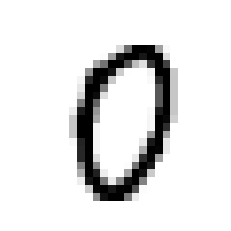

Answer =  0


In [2]:
# Show examples of datasets
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sample = X[1000]
sample = sample.reshape(28, 28) # 28 * 28 = 784

# Plot Data
plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

# Print Answer
print("Answer = ", y[1000])

## Test Set Separation

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

# Shuffle Training Set for Accuracy
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Naive Multinomial Classifier

In [4]:
# KNN is too slow for training so using stochastic method instead
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)
print("Train process finish")

Train process finish


/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [5]:
# Normal SGD Model test accuracy with cross validation
# Gets 85% Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.84275, 0.85485, 0.8733 ])

In [6]:
# Doing some Feature Scaling for the Accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9081 , 0.907  , 0.91415])

In [ ]:
# To Improve Teest Accuracy, need to tune hyperparameters
